In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind

In [152]:
df=pd.read_csv('Wholesale+Customers+Data.csv')
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [18]:
df.shape

(440, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [16]:
df.Channel.value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

Text(0.5, 1.0, 'Channel')

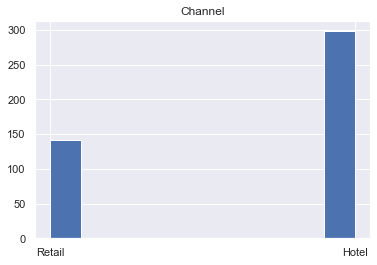

In [17]:
plt.hist(df['Channel']);
plt.title('Channel')

Text(0.5, 1.0, 'Region')

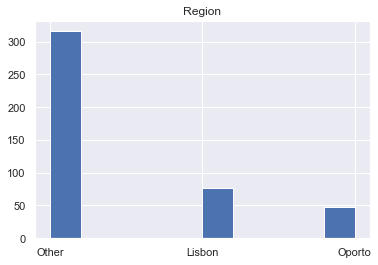

In [18]:
plt.hist(df['Region']);
plt.title('Region')

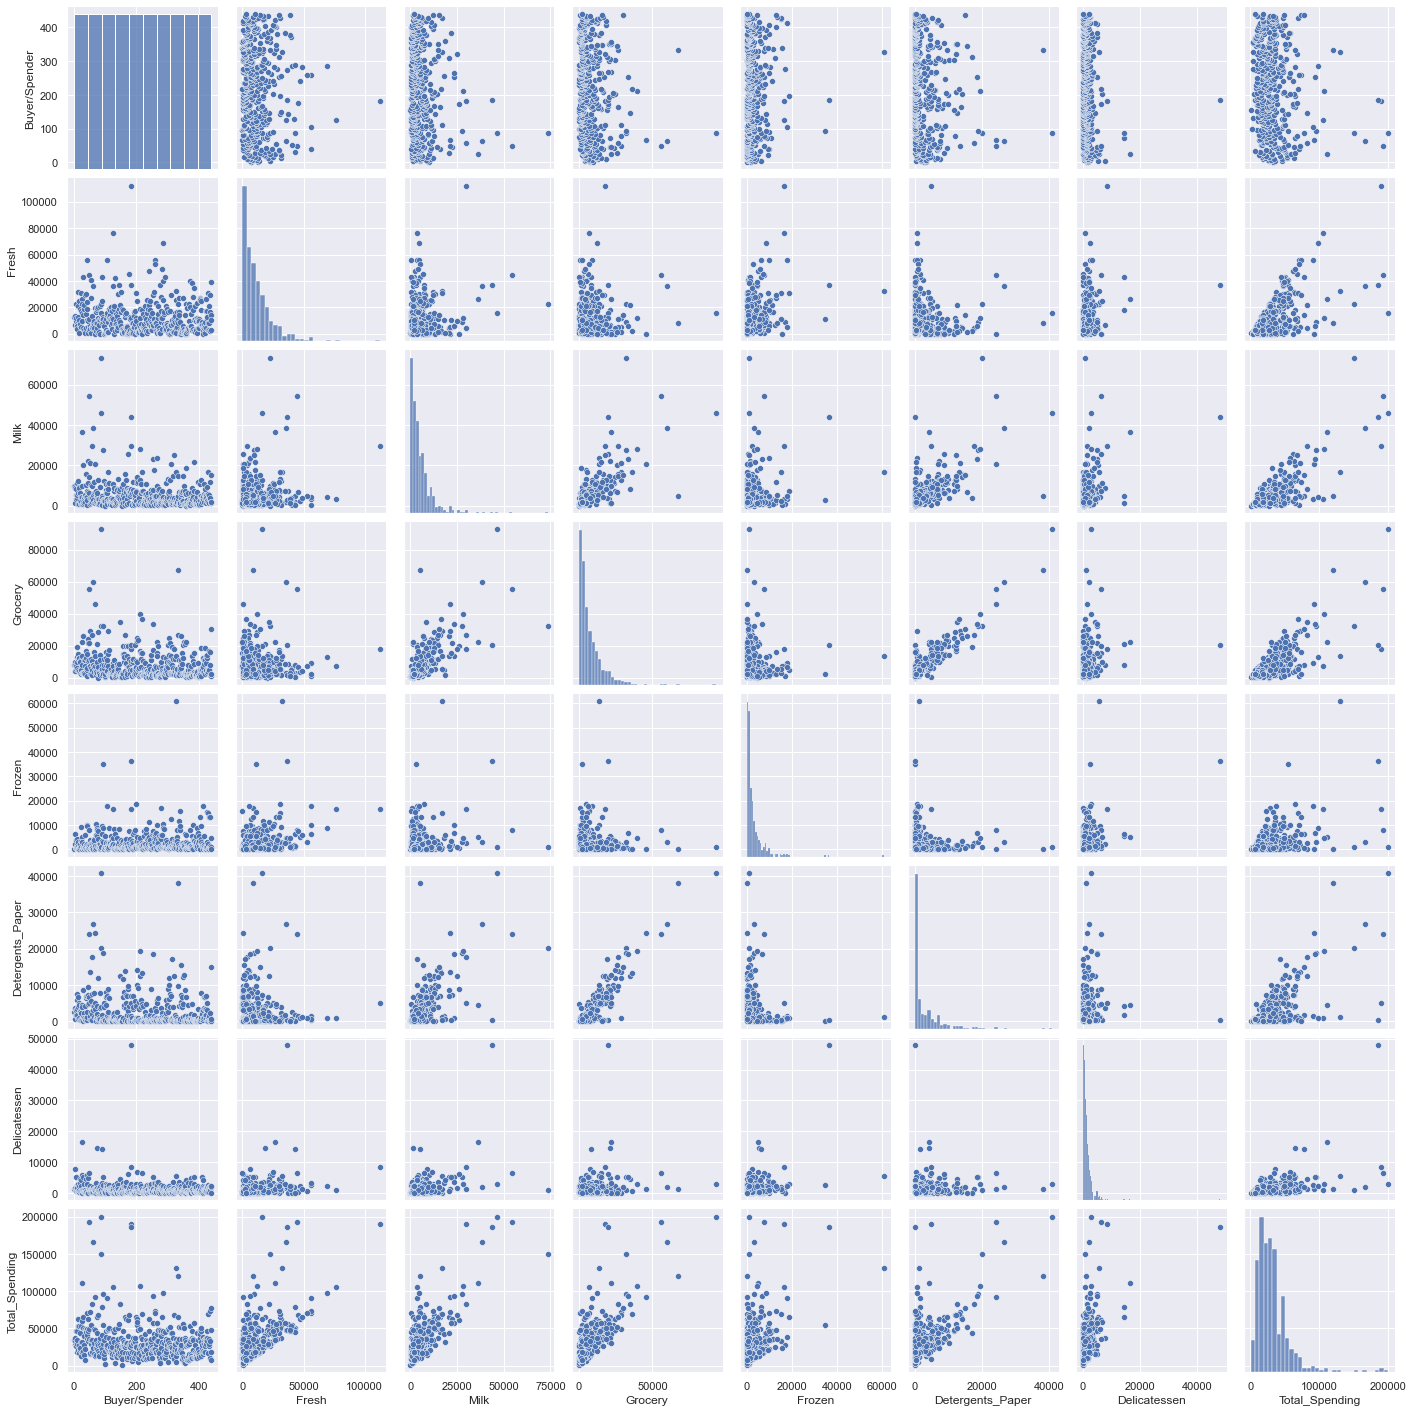

In [28]:
df['Total_Spending']= df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
Total_Spending

0      34112
1      33266
2      36610
3      27381
4      46100
       ...  
435    73302
436    48372
437    77407
438    17834
439     7589
Length: 440, dtype: int64

In [31]:
df.head().to_clipboard()

In [98]:
df.groupby('Channel')['Total_Spending'].sum()

Channel
Hotel     7999569
Retail    6619931
Name: Total_Spending, dtype: int64

In [100]:
df.groupby('Region')['Total_Spending'].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_Spending, dtype: int64

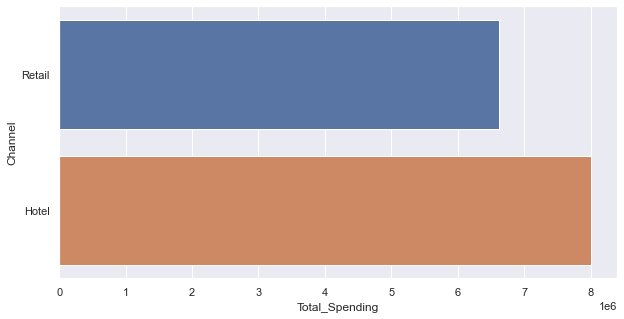

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Total_Spending'],y=df['Channel'],estimator=np.sum,ci=None)
plt.show()

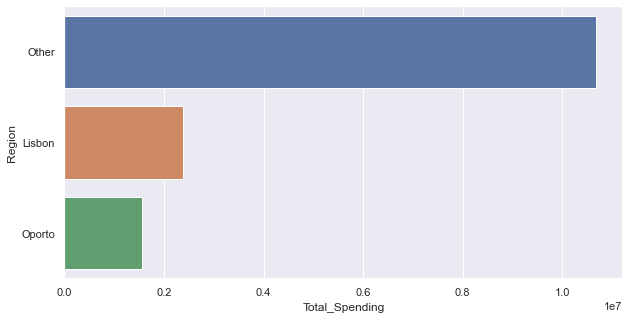

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(df['Total_Spending'],df['Region'],estimator=np.sum,ci=None)
plt.show()

In [137]:
df.groupby('Channel').mean()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
Channel,,,,,,,,
Hotel,238.369128,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
Retail,183.000000,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46619.232394


In [138]:
df.groupby('Region').mean()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
Region,,,,,,,,
Lisbon,235.000000,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
Oporto,317.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
Other,202.613924,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253


In [248]:
df.groupby(['Region','Channel']).agg(['mean','std'])

Buyer/Spender                     Fresh                \
                        mean         std          mean           std   
Region Channel                                                         
Lisbon Hotel      237.728814   21.411269  12902.254237  12342.008901   
       Retail     226.055556   23.725073   5200.000000   5415.521495   
Oporto Hotel      321.000000   12.262560  11650.535714   8969.362752   
       Retail     311.105263   13.904015   7289.789474   6867.934548   
Other  Hotel      227.582938  139.651493  13878.052133  14746.572913   
       Retail     152.438095  138.867530   9831.504762   9635.394129   

                        Milk                     Grocery                \
                        mean           std          mean           std   
Region Channel                                                           
Lisbon Hotel     3870.203390   4298.321195   4026.135593   3629.644143   
       Retail   10784.000000   6609.221463  18471.944444  10414.687844   
Oporto Hotel     2304.250000   2968.628697   4395.500000   3048.298815   
       Retail    9190.789474   6611.354136  16326.315789  14035.453775   
Other  Hotel     3486.981043   4508.505269   3886.734597   3593.506056   
       Retail   10981.009524  10574.827178  15953.809524  12298.935356   

                     Frozen               Detergents_Paper               \
                       mean           std             mean          std   
Region Channel                                                            
Lisbon Hotel    3127.322034   3276.460124       950.525424  1305.907616   
       Retail   2584.111111   2424.774577      8225.277778  5515.878798   
Oporto Hotel    5745.035714  11454.478518       482.714286   425.310506   
       Retail   1540.578947   2473.266471      8410.263158  8286.748255   
Other  Hotel    3656.900474   4956.590848       786.682464  1099.970640   
       Retail   1513.200000   1504.498737      6899.238095  6022.091110   

               Delicatessen              Total_Spending                
                       mean          std           mean           std  
Region Channel                                                         
Lisbon Hotel    1197.152542  1219.945304   26073.593220  16484.700897  
       Retail   1871.944444  1626.486667   47137.277778  23646.468894  
Oporto Hotel    1105.892857  1056.778800   25683.928571  22572.594954  
       Retail   1239.000000  1065.438042   43996.736842  22928.934726  
Other  Hotel    1518.284360  3663.183304   27213.635071  23532.179828  
       Retail   1826.209524  2119.052222   47004.971429  31365.497377

In [38]:
df.groupby(['Region','Channel'])['Fresh'].describe()

count          mean           std    min      25%     50%  \
Region Channel                                                              
Lisbon Hotel     59.0  12902.254237  12342.008901  514.0  4437.50  8656.0   
       Retail    18.0   5200.000000   5415.521495   18.0  2378.25  2926.0   
Oporto Hotel     28.0  11650.535714   8969.362752    3.0  4938.25  9787.0   
       Retail    19.0   7289.789474   6867.934548  161.0  2368.00  6468.0   
Other  Hotel    211.0  13878.052133  14746.572913    3.0  3702.50  9612.0   
       Retail   105.0   9831.504762   9635.394129   23.0  2343.00  7362.0   

                    75%       max  
Region Channel                     
Lisbon Hotel    18135.0   56083.0  
       Retail    5988.0   20782.0  
Oporto Hotel    17031.5   32717.0  
       Retail    9162.0   27082.0  
Other  Hotel    18821.0  112151.0  
       Retail   15076.0   44466.0

Text(0.5, 1.0, 'Item-Fresh')

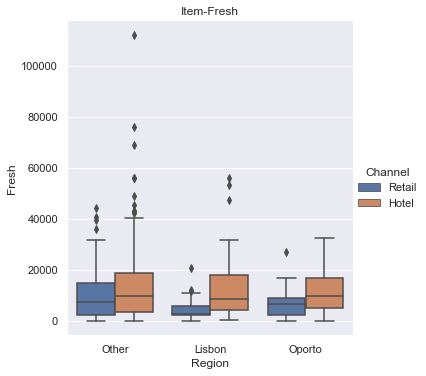

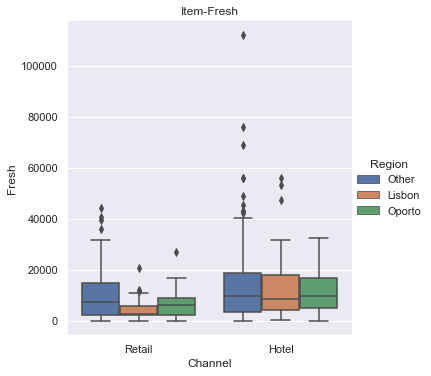

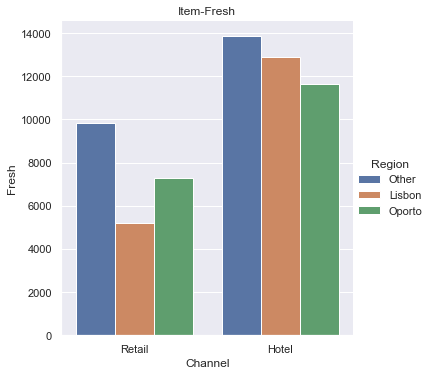

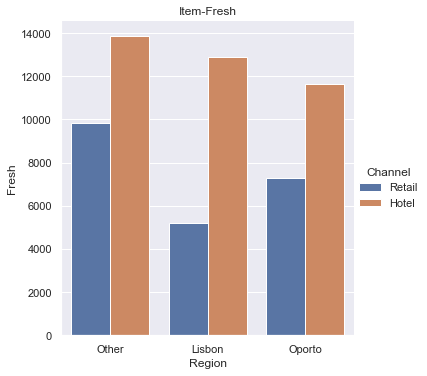

In [53]:
sns.catplot(x='Region',y='Fresh',hue='Channel',data=df,kind='box');
plt.title('Item-Fresh')
sns.catplot(x='Channel',y='Fresh',hue='Region',data=df,kind='box');
plt.title('Item-Fresh')
sns.catplot(x='Channel',y='Fresh',hue='Region',data=df,kind='bar',ci=None);
plt.title('Item-Fresh')
sns.catplot(x='Region',y='Fresh',hue='Channel',data=df,kind='bar',ci=None);
plt.title('Item-Fresh')

In [75]:
df.groupby(['Region','Channel'])['Milk'].describe()

count          mean           std     min      25%     50%  \
Region Channel                                                               
Lisbon Hotel     59.0   3870.203390   4298.321195   258.0  1071.00  2280.0   
       Retail    18.0  10784.000000   6609.221463  2527.0  6253.25  8866.0   
Oporto Hotel     28.0   2304.250000   2968.628697   333.0  1146.00  1560.5   
       Retail    19.0   9190.789474   6611.354136   928.0  4148.50  6817.0   
Other  Hotel    211.0   3486.981043   4508.505269    55.0  1188.50  2247.0   
       Retail   105.0  10981.009524  10574.827178  1124.0  6128.00  7845.0   

                     75%      max  
Region Channel                     
Lisbon Hotel     4995.50  23527.0  
       Retail   13112.25  28326.0  
Oporto Hotel     2344.75  16784.0  
       Retail   13127.50  25071.0  
Other  Hotel     4205.00  43950.0  
       Retail   11114.00  73498.0

In [79]:
df['Milk'].describe().to_clipboard()

In [74]:
df['Fresh'].describe()

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64

Text(0.5, 1.0, 'Item-Milk')

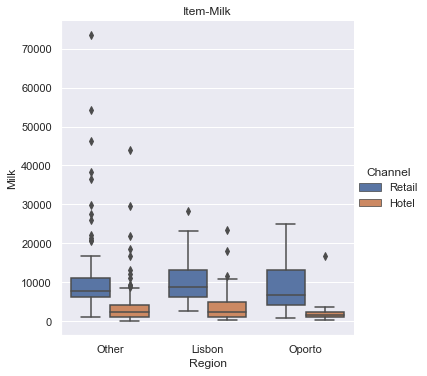

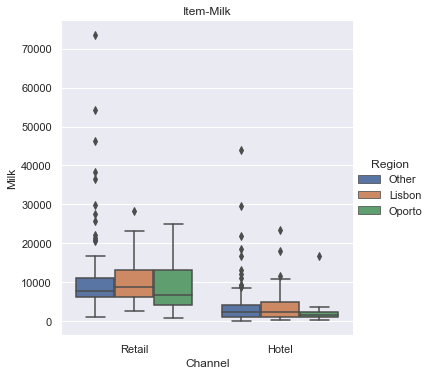

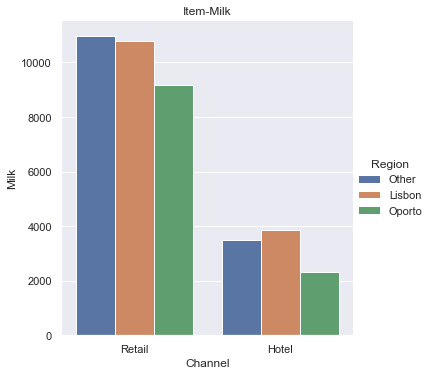

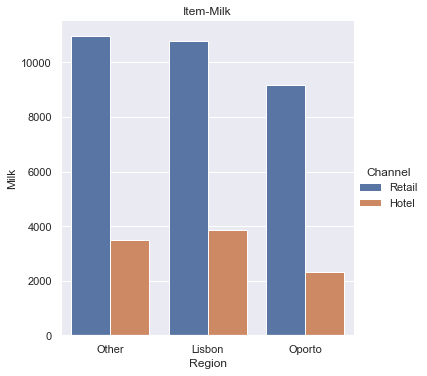

In [80]:
sns.catplot(x='Region',y='Milk',hue='Channel',data=df,kind='box');
plt.title('Item-Milk')
sns.catplot(x='Channel',y='Milk',hue='Region',data=df,kind='box');
plt.title('Item-Milk')
sns.catplot(x='Channel',y='Milk',hue='Region',data=df,kind='bar',ci=None);
plt.title('Item-Milk')
sns.catplot(x='Region',y='Milk',hue='Channel',data=df,kind='bar',ci=None);
plt.title('Item-Milk')

In [88]:
df.groupby(['Region','Channel'])['Grocery'].describe()

count          mean           std     min       25%      50%  \
Region Channel                                                                 
Lisbon Hotel     59.0   4026.135593   3629.644143   489.0   1620.00   2576.0   
       Retail    18.0  18471.944444  10414.687844  5265.0  10634.25  16106.0   
Oporto Hotel     28.0   4395.500000   3048.298815  1330.0   2373.75   3352.0   
       Retail    19.0  16326.315789  14035.453775  2743.0   9318.50  12469.0   
Other  Hotel    211.0   3886.734597   3593.506056     3.0   1666.00   2642.0   
       Retail   105.0  15953.809524  12298.935356  4523.0   9170.00  12121.0   

                     75%      max  
Region Channel                     
Lisbon Hotel     5172.50  16966.0  
       Retail   23478.75  39694.0  
Oporto Hotel     5527.50  13626.0  
       Retail   19785.50  67298.0  
Other  Hotel     4927.50  21042.0  
       Retail   19805.00  92780.0

Text(0.5, 1.0, 'Item-Grocery')

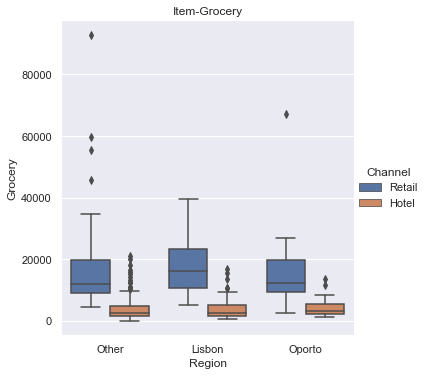

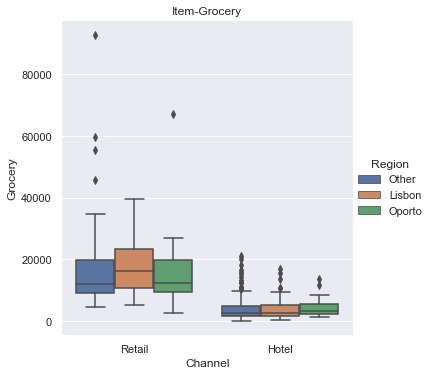

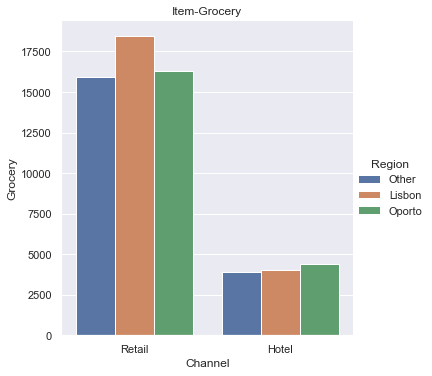

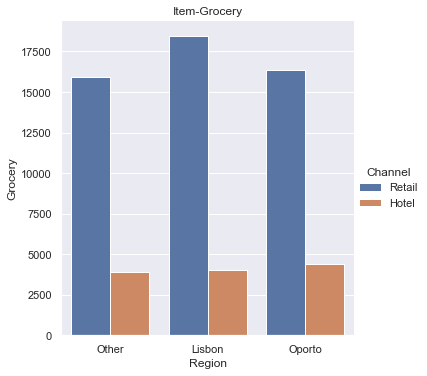

In [86]:
sns.catplot(x='Region',y='Grocery',hue='Channel',data=df,kind='box');
plt.title('Item-Grocery')
sns.catplot(x='Channel',y='Grocery',hue='Region',data=df,kind='box');
plt.title('Item-Grocery')
sns.catplot(x='Channel',y='Grocery',hue='Region',data=df,kind='bar',ci=None);
plt.title('Item-Grocery')
sns.catplot(x='Region',y='Grocery',hue='Channel',data=df,kind='bar',ci=None);
plt.title('Item-Grocery')

In [91]:
df['Grocery'].describe()

count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
25%       2153.000000
50%       4755.500000
75%      10655.750000
max      92780.000000
Name: Grocery, dtype: float64

In [93]:
df.groupby(['Channel'])['Grocery'].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,3962.137584,3545.513391,3.0,1703.75,2684.0,5076.75,21042.0
Retail,142.0,16322.852113,12267.318094,2743.0,9245.25,12390.0,20183.50,92780.0


In [96]:
df.groupby(['Region','Channel'])['Frozen'].describe()

count         mean           std    min     25%     50%  \
Region Channel                                                            
Lisbon Hotel     59.0  3127.322034   3276.460124   91.0  966.00  1859.0   
       Retail    18.0  2584.111111   2424.774577   61.0  923.50  1522.0   
Oporto Hotel     28.0  5745.035714  11454.478518  264.0  962.25  2696.5   
       Retail    19.0  1540.578947   2473.266471  131.0  639.50   934.0   
Other  Hotel    211.0  3656.900474   4956.590848   25.0  779.00  1960.0   
       Retail   105.0  1513.200000   1504.498737   33.0  437.00  1059.0   

                   75%      max  
Region Channel                   
Lisbon Hotel    4479.0  18711.0  
       Retail   3843.0   8321.0  
Oporto Hotel    4617.0  60869.0  
       Retail   1410.0  11559.0  
Other  Hotel    4542.5  36534.0  
       Retail   2194.0   8132.0

Text(0.5, 1.0, 'Item-Frozen')

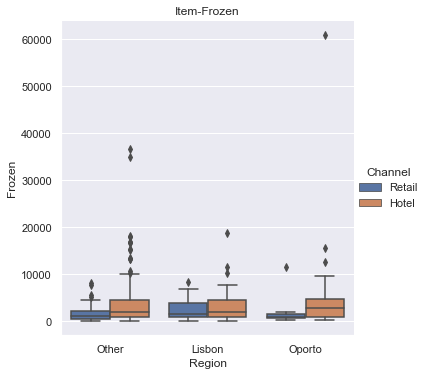

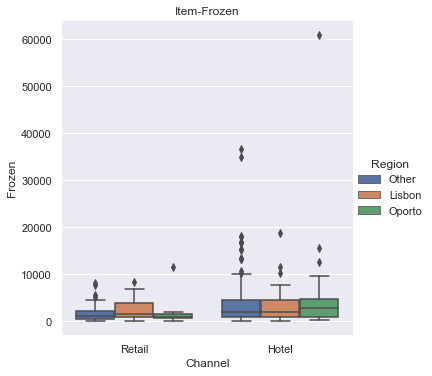

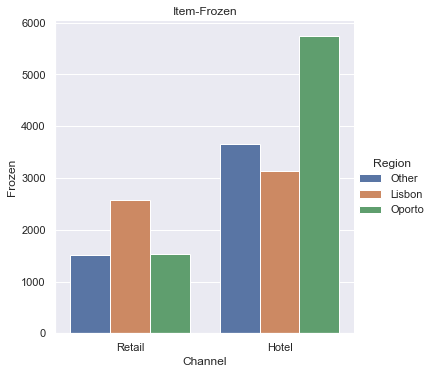

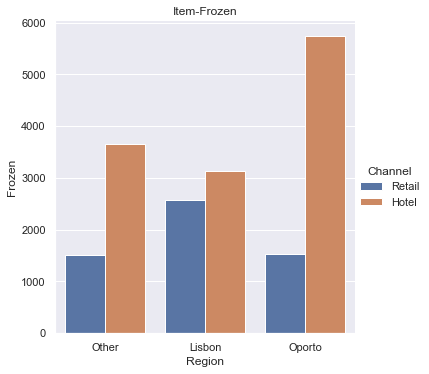

In [98]:
sns.catplot(x='Region',y='Frozen',hue='Channel',data=df,kind='box');
plt.title('Item-Frozen')
sns.catplot(x='Channel',y='Frozen',hue='Region',data=df,kind='box');
plt.title('Item-Frozen')
sns.catplot(x='Channel',y='Frozen',hue='Region',data=df,kind='bar',ci=None);
plt.title('Item-Frozen')
sns.catplot(x='Region',y='Frozen',hue='Channel',data=df,kind='bar',ci=None);
plt.title('Item-Frozen')

In [101]:
df.groupby(['Channel'])['Frozen'].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,3748.251678,5643.912500,25.0,830.00,2057.5,4558.75,60869.0
Retail,142.0,1652.612676,1812.803662,33.0,534.25,1081.0,2146.75,11559.0


In [107]:
df['Frozen'].describe()

count      440.000000
mean      3071.931818
std       4854.673333
min         25.000000
25%        742.250000
50%       1526.000000
75%       3554.250000
max      60869.000000
Name: Frozen, dtype: float64

In [110]:
df.groupby(['Region','Channel'])['Detergents_Paper'].describe()

count         mean          std    min      25%     50%  \
Region Channel                                                            
Lisbon Hotel     59.0   950.525424  1305.907616    5.0   237.00   412.0   
       Retail    18.0  8225.277778  5515.878798  788.0  4818.25  6177.0   
Oporto Hotel     28.0   482.714286   425.310506   15.0   182.75   325.0   
       Retail    19.0  8410.263158  8286.748255  332.0  3900.00  6236.0   
Other  Hotel    211.0   786.682464  1099.970640    3.0   176.50   375.0   
       Retail   105.0  6899.238095  6022.091110  523.0  3537.00  5121.0   

                     75%      max  
Region Channel                     
Lisbon Hotel      874.00   5828.0  
       Retail   11804.75  19410.0  
Oporto Hotel      707.00   1679.0  
       Retail    9837.50  38102.0  
Other  Hotel      948.50   6907.0  
       Retail    7677.00  40827.0

Text(0.5, 1.0, 'Item-Detergents_Paper')

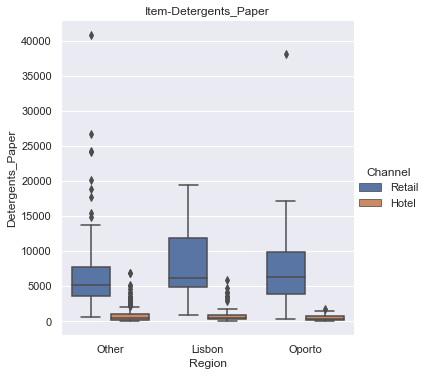

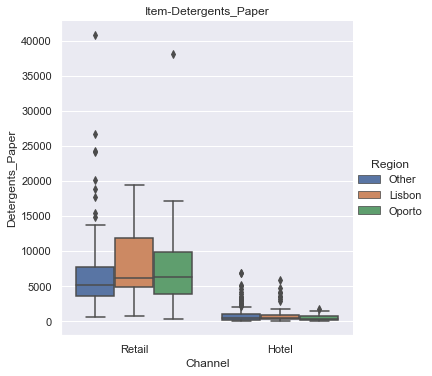

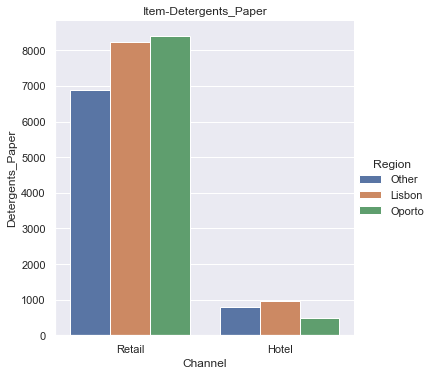

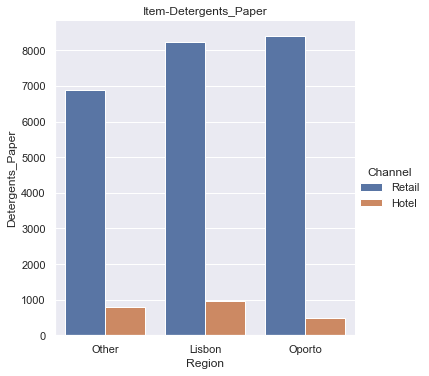

In [112]:
sns.catplot(x='Region',y='Detergents_Paper',hue='Channel',data=df,kind='box');
plt.title('Item-Detergents_Paper')
sns.catplot(x='Channel',y='Detergents_Paper',hue='Region',data=df,kind='box');
plt.title('Item-Detergents_Paper')
sns.catplot(x='Channel',y='Detergents_Paper',hue='Region',data=df,kind='bar',ci=None);
plt.title('Item-Detergents_Paper')
sns.catplot(x='Region',y='Detergents_Paper',hue='Channel',data=df,kind='bar',ci=None);
plt.title('Item-Detergents_Paper')

In [115]:
df.groupby(['Channel'])['Detergents_Paper'].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,790.560403,1104.093673,3.0,183.25,385.5,899.5,6907.0
Retail,142.0,7269.507042,6291.089697,332.0,3683.50,5614.5,8662.5,40827.0


In [120]:
df.groupby(['Region','Channel'])['Delicatessen'].describe()

count         mean          std    min     25%     50%  \
Region Channel                                                           
Lisbon Hotel     59.0  1197.152542  1219.945304    7.0  374.00   749.0   
       Retail    18.0  1871.944444  1626.486667  120.0  746.00  1414.0   
Oporto Hotel     28.0  1105.892857  1056.778800   51.0  567.25   883.0   
       Retail    19.0  1239.000000  1065.438042   59.0  392.50  1037.0   
Other  Hotel    211.0  1518.284360  3663.183304    3.0  378.50   823.0   
       Retail   105.0  1826.209524  2119.052222    3.0  545.00  1386.0   

                   75%      max  
Region Channel                   
Lisbon Hotel    1621.5   6854.0  
       Retail   2456.5   6372.0  
Oporto Hotel    1146.0   5609.0  
       Retail   1815.0   3508.0  
Other  Hotel    1582.0  47943.0  
       Retail   2158.0  16523.0

Text(0.5, 1.0, 'Item-Delicatessen')

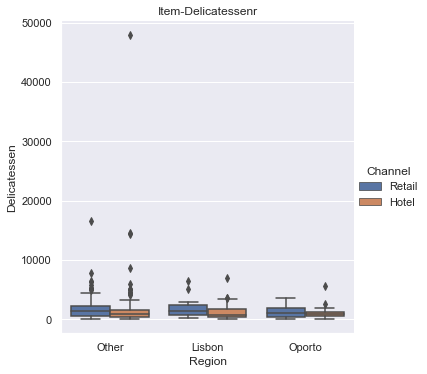

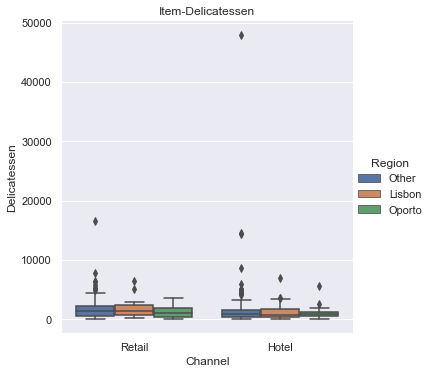

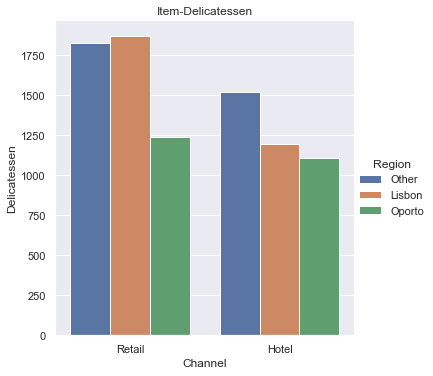

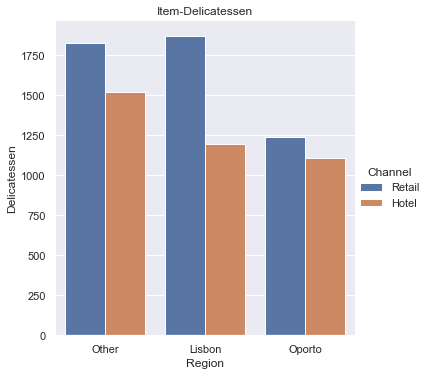

In [123]:
sns.catplot(x='Region',y='Delicatessen',hue='Channel',data=df,kind='box');
plt.title('Item-Delicatessenr')
sns.catplot(x='Channel',y='Delicatessen',hue='Region',data=df,kind='box');
plt.title('Item-Delicatessen')
sns.catplot(x='Channel',y='Delicatessen',hue='Region',data=df,kind='bar',ci=None);
plt.title('Item-Delicatessen')
sns.catplot(x='Region',y='Delicatessen',hue='Channel',data=df,kind='bar',ci=None);
plt.title('Item-Delicatessen')

In [125]:
df.groupby(['Channel'])['Delicatessen'].describe()

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
Hotel,298.0,1415.956376,3147.426922,3.0,379.00,821.0,1548.0,47943.0
Retail,142.0,1753.436620,1953.797047,3.0,566.75,1350.0,2156.0,16523.0


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total_Spending,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [170]:
print('CV for Fresh item expenditure is',df['Fresh'].std()/df['Fresh'].mean())
print('CV for Milk expenditure is',df['Milk'].std()/df['Milk'].mean())
print('CV for Grocery expenditure is',df['Grocery'].std()/df['Grocery'].mean())
print('CV for Frozen Item expenditure is',df['Frozen'].std()/df['Frozen'].mean())
print('CV for Detergents Paper expenditure is',df['Detergents_Paper'].std()/df['Detergents_Paper'].mean())
print('CV for Delicatessen expenditure is',df['Delicatessen'].std()/df['Delicatessen'].mean())

CV for Fresh item expenditure is 1.0539179237473149
CV for Milk expenditure is 1.2732985840065414
CV for Grocery expenditure is 1.1951743730016824
CV for Frozen Item expenditure is 1.5803323836352914
CV for Detergents Paper expenditure is 1.6546471385005155
CV for Delicatessen expenditure is 1.8494068981158382


In [153]:
corr=df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].corr()
corr.to_clipboard()

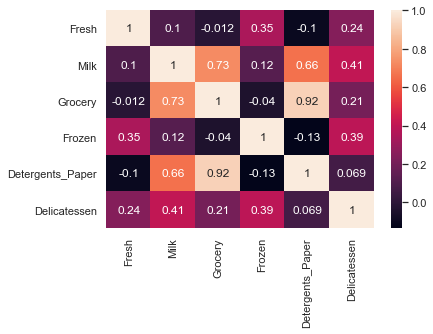

In [199]:
sns.heatmap(corr,annot=True);

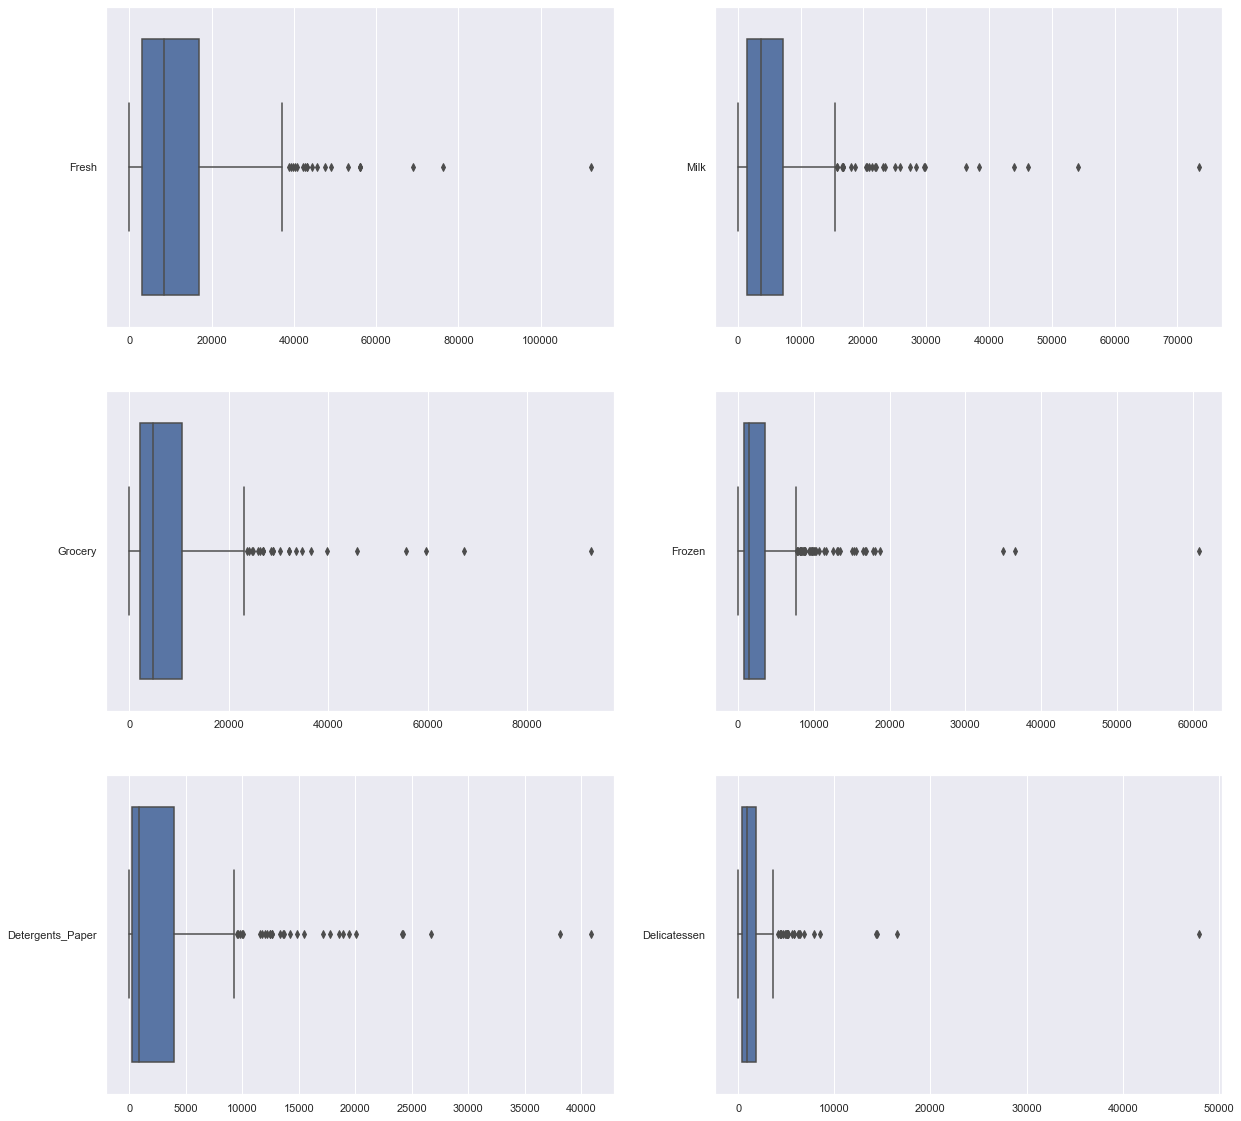

In [262]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 20)
a = sns.boxplot(data=df[['Fresh']] ,orient = "h" , ax=axes[0][0])
b = sns.boxplot(data=df[['Milk']] ,orient = "h" , ax=axes[0][1])
c = sns.boxplot(data=df[['Grocery']] ,orient = "h" , ax=axes[1][0])
d = sns.boxplot(data=df[['Frozen']] ,orient = "h" , ax=axes[1][1])
e = sns.boxplot(data=df[['Detergents_Paper']] ,orient = "h" , ax=axes[2][0])
f = sns.boxplot(data=df[['Delicatessen']] ,orient = "h" , ax=axes[2][1])

In [264]:
df.skew()

Buyer/Spender        0.000000
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
Total_Spending       3.028218
dtype: float64

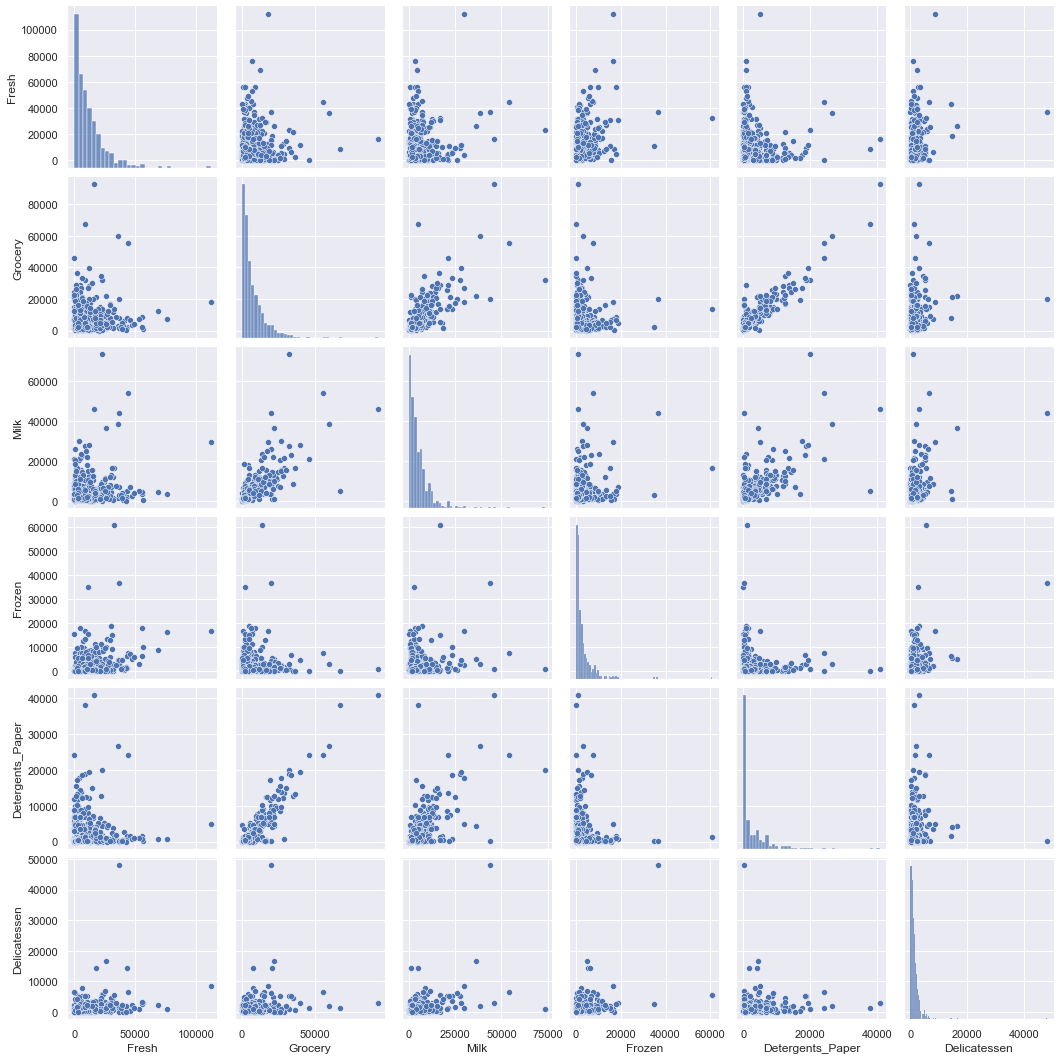

In [271]:
sns.pairplot(df[['Fresh','Grocery','Milk','Frozen','Detergents_Paper','Delicatessen']]);

In [13]:
P2=pd.read_csv('Survey-1.csv')
P2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [5]:
g_m =pd.crosstab(index=P2['Gender'],columns=P2['Major'])
g_m

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [33]:
g_g=pd.crosstab(index=P2['Gender'],columns=P2['Grad Intention'])
g_g

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [9]:
g_e=pd.crosstab(index=P2['Gender'],columns=P2['Employment'])
g_e

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [10]:
g_c=pd.crosstab(index=P2['Gender'],columns=P2['Computer'])
g_c.to_clipboard()

In [298]:
P2.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [315]:
print('The Probability that the randomly selected student will be a male is', (round(29/62*100,2)),'%')

The Probability that the randomly selected student will be a male is 46.77 %


In [317]:
print(' the probability that a randomly selected CMSU student will be female',(round(33/62*100,2)),'%')

 the probability that a randomly selected CMSU student will be female 53.23 %


In [17]:
print('The Probability that a male student will major in Accounting is', (round(4/29*100,2)),'%')
print('The Probability that a male student will major in CIS is', (round(1/29*100,2)),'%')
print('The Probability that a male student will major in Economics/Finance is', (round(4/29*100,2)),'%')
print('The Probability that a male student will major in International Business is', (round(2/29*100,2)),'%')
print('The Probability that a male student will major in Management is', (round(6/29*100,2)),'%')
print('The Probability that a male student will major in Other is', (round(4/29*100,2)),'%')
print('The Probability that a male student will major in Retailing/Marketing is', (round(5/29*100,2)),'%')
print('The Probability that a male student will major in undecided is', (round(3/29*100,2)),'%')

The Probability that a male student will major in Accounting is 13.79 %
The Probability that a male student will major in CIS is 3.45 %
The Probability that a male student will major in Economics/Finance is 13.79 %
The Probability that a male student will major in International Business is 6.9 %
The Probability that a male student will major in Management is 20.69 %
The Probability that a male student will major in Other is 13.79 %
The Probability that a male student will major in Retailing/Marketing is 17.24 %
The Probability that a male student will major in undecided is 10.34 %


In [20]:
print('The Probability that a female student will major in Accounting is', (round(3/33*100,2)),'%')
print('The Probability that a female student will major in CIS is', (round(3/33*100,2)),'%')
print('The Probability that a female student will major in Economics/Finance is', (round(7/33*100,2)),'%')
print('The Probability that a female student will major in International Business is', (round(4/33*100,2)),'%')
print('The Probability that a female student will major in Management is', (round(4/33*100,2)),'%')
print('The Probability that a female student will major in Other is', (round(3/33*100,2)),'%')
print('The Probability that a female student will major in Retailing/Marketing is', (round(9/33*100,2)),'%')
print('The Probability that a female student will major in undecided is', (round(0/33*100,2)),'%')

The Probability that a female student will major in Accounting is 9.09 %
The Probability that a female student will major in CIS is 9.09 %
The Probability that a female student will major in Economics/Finance is 21.21 %
The Probability that a female student will major in International Business is 12.12 %
The Probability that a female student will major in Management is 12.12 %
The Probability that a female student will major in Other is 9.09 %
The Probability that a female student will major in Retailing/Marketing is 27.27 %
The Probability that a female student will major in undecided is 0.0 %


In [25]:
print("P(Intends to graduate ∩ Male) = P (Intends to graduate| Male) x P (male),(17/29)*(29/62) = ",round((17/29) * (29/62),2),'%')

P(Intends to graduate ∩ Male) = P (Intends to graduate| Male) x P (male),(17/29)*(29/62) =  0.27 %


In [27]:
print("P(No Laptop ∩ Female) = P (No Laptop| Female) x P (Female),(4/33)*(33/62) = ",round((4/33) * (33/62),2),'%')

P(No Laptop ∩ Female) = P (No Laptop| Female) x P (Female),(4/33)*(33/62) =  0.06 %


In [29]:
print("P(Full Time Employment U Male) = P (Full Time Employment) + P (Male),(10/62)+(29/62) = ",round((10/62) + (29/62),2),'%')

P(Full Time Employment U Male) = P (Full Time Employment) + P (Male),(10/62)+(29/62) =  0.63 %


In [47]:
g_g

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [50]:
P2['GPA'].describe()

count    62.000000
mean      3.129032
std       0.377388
min       2.300000
25%       2.900000
50%       3.150000
75%       3.400000
max       3.900000
Name: GPA, dtype: float64

In [52]:
stats.norm.cdf(-0.341908063)

0.36621004076898733

In [55]:
stats.norm.cdf(3,loc=3.129032,scale=0.377388)

0.36621004084820064

In [96]:
p2_new=P2[(P2['GPA']<3)]
p2_new.value_counts('Gender').sum()

17

In [68]:
p2_new.value_counts('GPA').sum()/62

0.27419354838709675

In [84]:
dfc=P2[(P2["Salary"]<50) & (P2["Gender"]=="Male")]
dfc.value_counts('Gender')

Gender
Male    15
dtype: int64

In [86]:
dfc1=P2[(P2["Salary"]>=50) & (P2["Gender"]=="Male")]
dfc1.value_counts('Gender')

Gender
Male    14
dtype: int64

In [94]:
dfc2=P2[(P2["Salary"]>=50) & (P2["Gender"]=="Female")]
dfc2.value_counts('Gender')

Gender
Female    18
dtype: int64

In [90]:
dfc3=P2[(P2["Salary"]<50) & (P2["Gender"]=="Female")]
dfc3.value_counts('Gender')

Gender
Female    15
dtype: int64

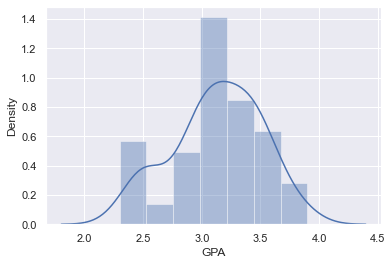

In [99]:
sns.distplot(P2['GPA']);


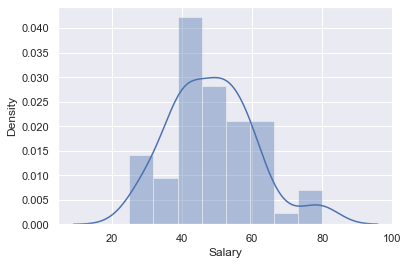

In [102]:
sns.distplot(P2['Salary']);


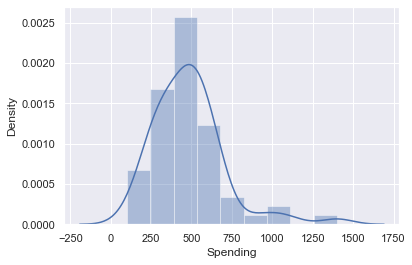

In [103]:
sns.distplot(P2['Spending']);


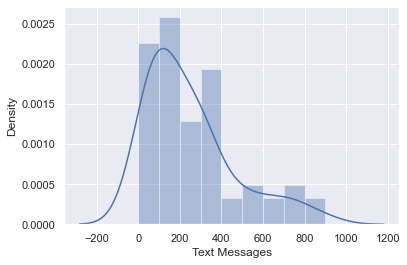

In [104]:
sns.distplot(P2['Text Messages']);

In [113]:
P2.describe().T.to_clipboard()

In [121]:
mydata=pd.read_csv('A+&+B+shingles.csv')
mydata.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [126]:
t_statistic, p_value = ttest_1samp(mydata.A,0.35)
print('one sample t test \nt statistic:{0} p value:{1}' .format(t_statistic, p_value))

one sample t test 
t statistic:-1.4735046253382782 p value:0.14955266289815025


In [129]:
0.14955266289815025/2

0.07477633144907513

In [137]:
mydata.isnull().sum()

A    0
B    5
dtype: int64

In [143]:
mydata2=mydata['B'].dropna()
mydata2

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
Name: B, dtype: float64

In [146]:
t_statistic, p_value = ttest_1samp(mydata2,0.35)
print('one sample t test \nt statistic:{0} p value:{1}' .format(t_statistic, p_value/2))

one sample t test 
t statistic:-3.1003313069986995 p value:0.0020904774003191813


In [154]:
t_statistic,p_value=ttest_ind(mydata.A,mydata2)
print('tstat',t_statistic)
print('P Value',p_value)

tstat 1.289628271966112
P Value 0.2017496571835328


In [ ]:
import